<a href="https://colab.research.google.com/github/KhuramC/SoftwareTutorials/blob/main/B1_Creating_A_Single_Cell_Model_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating A Single Cell in NEURON
This lab will go over the morphology of a cell and how it is simulated in NEURON. It will also go over how to change the morphology by adding channels. Lastly it will go over how to make a simulation of the cell using either voltage/current clamps in NEURON.

#Components of a Neuron
Before we get to simulating a neuron, we need to know what to put in the soma of the neuron.
Create a list of all the necessary components of the soma and then draw the

1.   Create a list of the all necessary components for the soma.
2.   Draw the soma and label it with all of the components.
Hint: Draw the electrical circuit of the soma and show the 1:1 pairing to help make sure you have everything.

In the meantime, we will install NEURON and import some libraries that will be useful later. A refresher on the electrical circuit model and how neurons are electrical circuits is provided below.


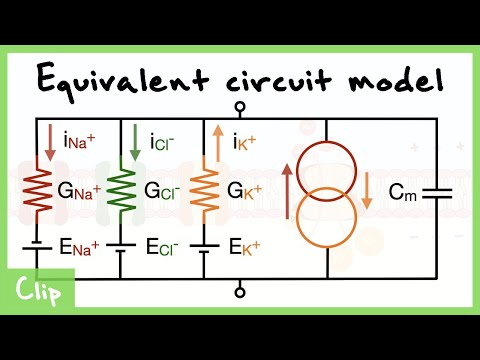

In [1]:
RunningInCOLAB = 'google.colab' in str(get_ipython())
if RunningInCOLAB:
  !pip install neuron #installs NEURON if in google Colab

from IPython.display import YouTubeVideo
YouTubeVideo('LdumhvDBpzQ')

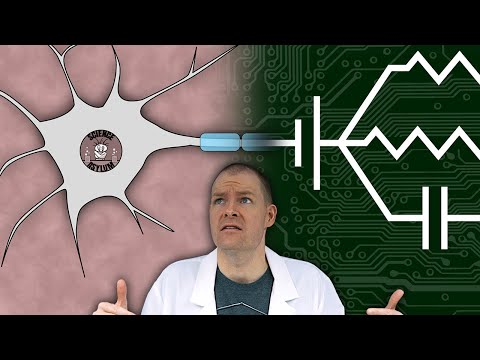

In [2]:
YouTubeVideo('YQsSrW5oX80')

In [3]:
from neuron import h
import matplotlib.pyplot as plt
import numpy as np
h.load_file('stdrun.hoc') #necessary to later do a simulation

1.0

# Components of a Neuron Continued
Your drawing should highlight the current injection into the soma, the neuron as a capacitor with liquid plates, the leak channel acting as a resistor and battery based off its reversal potential, amongst a couple of more concepts. An example of a drawing of the biological model of a neuron is given here:
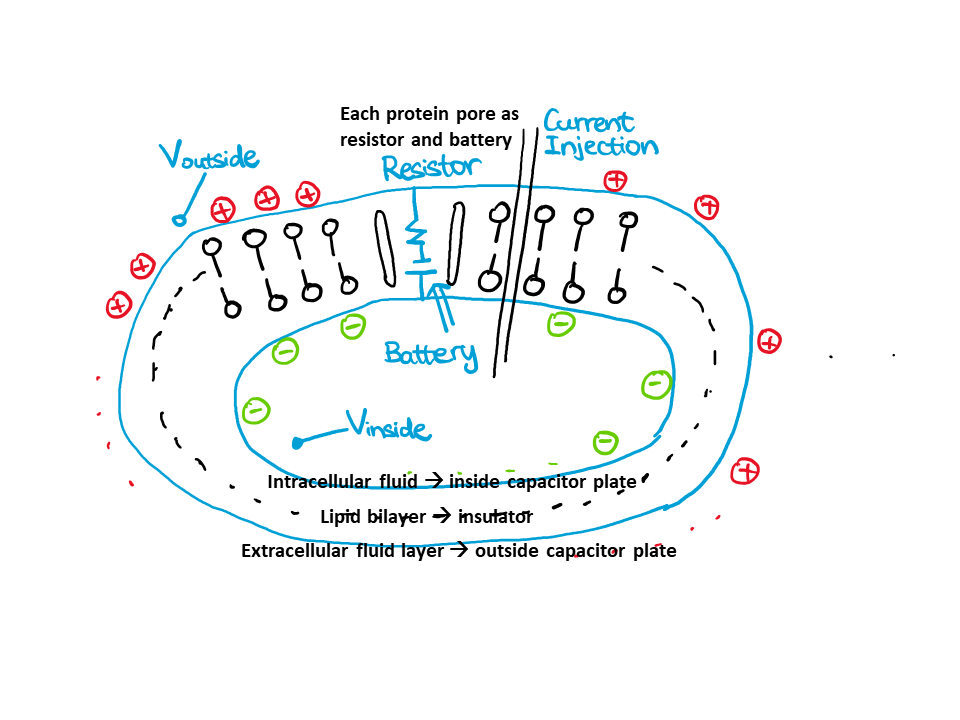

This video goes over the the lipid bilayer surrounding the cell real quick as a review as well.

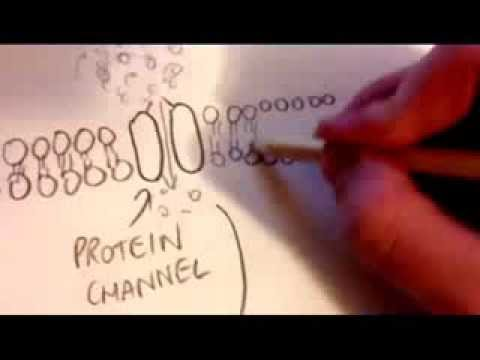

In [4]:
YouTubeVideo('x8ROEj2SFes')

# From Drawings to Code
So how do we create the soma with these things within NEURON? It's actually very simple. NEURON defines parts of the cell as sections. NEURON defines sections as cylindrical sections, with a diameter and a length.  A dendrite would be one section, the soma another, and the axon would be the last. When created, such sections are populated by default values.

![image](https://raw.githubusercontent.com/chenziao/Software_Tutorials_Colab/main/S1_PassiveMembrane/cylinder.png)

Every section can then be further subdivided into segments, which are equally lengthed segments that divide the section. Since nothing special is occuring in this notebook, we will divide the soma into three segments.



In [5]:
soma = h.Section(name='Soma') #creates soma
soma.nseg = 3 #defines how many segments to divide soma into
print("The default length is " + str(soma.L) + " microns")
print("The default diameter is " + str(soma.diam) + " microns")
print("The default capacitance is " + str(soma.cm) + " microFarad / cm^2")
print("The default cytoplasmic resistivity is " + str(soma.Ra) + " ohm-cm")
soma.L = 35
soma.diam = 35
soma_length = soma.L
soma_diam = soma.diam


The default length is 100.0 microns
The default diameter is 500.0 microns
The default capacitance is 1.0 microFarad / cm^2
The default cytoplasmic resistivity is 35.4 ohm-cm


These values are unrealistic for mammalian neurons since they come from Hodgkin and Huxley's experiments with a squid giant axon. However, we can always change them to something different. Here we change the diameter and length to be 35 microns.
For more information on some neurons' typical geometries, click [here.](https://synapseweb.clm.utexas.edu/dimensions-dendrites)

# Adding Leak/Passive Channels
One might notice that there is many things missing from our model so far. We have no channels, and as a result there is not even a resting membrane potential. So first, let's add the passive/leak channels to our soma.


In [6]:
soma.insert('pas') #inserts passive channel
print("Default E_leak = " +str(soma.e_pas) + " mV")
print("Default g_leak = " + str(soma.g_pas) + " S/cm^2")

Default E_leak = -70.0 mV
Default g_leak = 0.001 S/cm^2


The resting membrane potential is just e_leak. In this case, the default values are realistic.

# Adding Active Channels
We have everything to model a passive membrane. However, active channels do exist, and can also be added. We will be inserting Hodgkin-Huxley channels to the soma, so their defaults will also be based off the squid giant axon. These hh channels also include a leak channel based off the squid giant axon, which we will not be using since we already have leak channels.



In [7]:
soma.insert('hh') #insert Hodgkin-Huxley channels
print("Default El_hh = " +str(soma.el_hh) + " mV")
print("Default gl_hh = " + str(soma.gl_hh) + " S/cm^2")
print("Default Ek = " +str(soma.ek) + " mV")
print("Default gkbar_hh = " + str(soma.gkbar_hh) + " S/cm^2")
print("Default Ena = " +str(soma.ena) + " mV")
print("Default gnabar_hh = " + str(soma.gnabar_hh) + " S/cm^2")
soma.gl_hh = 0 #changing soma's gleak_hh to be 0 as we already have passive channels, effectively disabling it.

Default El_hh = -54.3 mV
Default gl_hh = 0.0003 S/cm^2
Default Ek = -77.0 mV
Default gkbar_hh = 0.036 S/cm^2
Default Ena = 50.0 mV
Default gnabar_hh = 0.12 S/cm^2


#Current Clamp
A current clamp injects a steady current into the soma and is typically used to measure the change in voltage. Current Clamps have four parameters: the location(so where in the soma on a 0-1 scale), the duration(how long you will be injecting current for), the amplitude(how much current), and delay(how long will you wait until you inject).

In [8]:
ic = h.IClamp(soma(0.5)) # middle of soma
ic.dur = 2.5 #ms
ic.amp = 1 #nA
ic.delay = 100 #ms

#Extras: Voltage Clamp
A voltage clamp holds the voltage at a steady state value and is used to measure the current. Voltage clamps do not have a delay parameter. We will only be showcasing current clamp in this lab, but the commented code below shows how one could implement a voltage clamp.

In [9]:
#vc = h.VClamp(soma(0.5)) #middle of soma
#vc.dur[0] = 500 #ms
#vc.amp[0] = -10 #mV

# Running a Simulation
Now we have a full cell with the necessary things. But how is the voltage going to change due to our clamps? If we start a simulation, we can find out. But we need to define how long the simulation is, how long each step forward in the simulation, and record the values throughout the simulation.

In [10]:
h.v_init= soma.e_pas #initial voltage is the resting membrane potential of the soma
h.tstop = tstop = 200 # how long to run the simulation in ms
h.dt = 0.025 # time step (resolution) of the simulation in ms

# define two vectors for recording variables
t_vec = h.Vector()
soma_v_vec = h.Vector()
# record the voltage (_ref_v) and time (_ref_t) and voltage(_ref_v) into the vectors we just created
t_vec.record(h._ref_t)
soma_v_vec.record(soma(0.5)._ref_v)
h.run()

0.0

# Plotting Results
Even though we've ran the simulation, we need to show the results. Matplotlib allows us to graph our results with respect to time.
What do you think will happen to the soma's voltage throughout the simulation?


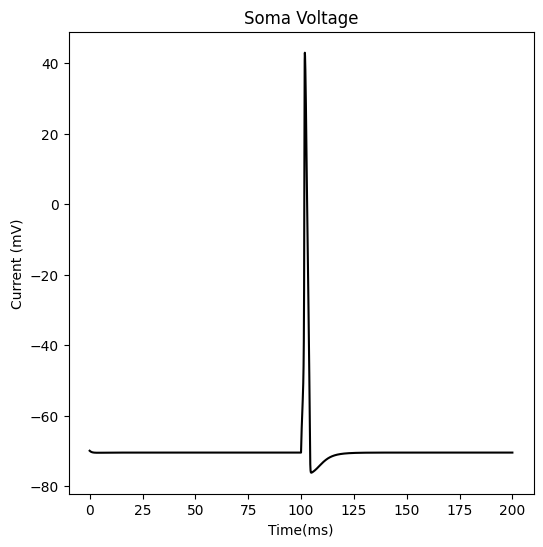

In [11]:
fig, axs = plt.subplots(1,1,figsize=(6, 6))
axs.plot(t_vec,soma_v_vec, color = 'black') #plotting time vs current
axs.set_title(str(soma) + ' Voltage')
axs.set_xlabel('Time(ms)')
axs.set_ylabel('Current (mV)')
plt.show()

An action potential occurs with the default values.

#But What does the Soma with Channels Actually Look Like?
Below is an interactive tool that allows you too see how the morphology of the soma changes depending on the soma's length, diameter, and what channels are inserted in. You can then also see how that will change what happens to the soma's voltage throughout the simulation.


In [12]:
#function for graphing soma morphology and voltage
def graph(soma_length,soma_diam,leak_channel,k_channel,na_channel,t_vec,soma_v_vec,ileak_vec,ik_vec,ina_vec):
  #Create the plot
  fig, axs = plt.subplots(3,1,figsize=(10, 8)) # 3 subplots of the same size

  #colors for the three different currents
  leak_color = 'purple'
  k_color = 'blue'
  na_color = 'red'
  soma_color = 'black'

  #Soma morphology
  #Make Soma
  #outer lines
  soma_xcoords = [0,soma_length]
  soma_ycoords = [-soma_diam/2,soma_diam/2]
  axs[0].plot(soma_xcoords,[-soma_diam/2,-soma_diam/2], color = soma_color) #bottom line
  axs[0].plot(soma_xcoords,[soma_diam/2,soma_diam/2], color = soma_color) #upper line
  axs[0].plot([0,0],soma_ycoords, color = soma_color) #left line
  axs[0].plot([soma_length,soma_length],soma_ycoords, color = soma_color) #right line

  #inner lines to indicate bilayer
  in_soma_xcoords = [soma_length*0.01, soma_length*0.99]
  in_soma_ycoords = [-soma_diam/2*0.77, soma_diam/2*0.77]
  axs[0].plot(in_soma_xcoords,[soma_diam/2*0.77,soma_diam/2*0.77],color = soma_color) #upper line
  axs[0].plot(in_soma_xcoords,[-soma_diam/2*0.77,-soma_diam/2*0.77],color = soma_color) #bottom line
  axs[0].plot([soma_length*0.01,soma_length*0.01],in_soma_ycoords,color = soma_color) #left line
  axs[0].plot([soma_length*0.99,soma_length*0.99],in_soma_ycoords,color = soma_color) #right line

  #axs[0].fill_between(soma_xcoords, soma_diam/2,-soma_diam/2, color = soma_color) #soma rectangle



  #Adding + and - to show that cell is naturally polarized.
  for i in range(int(soma_length)):
    if(i % int(soma_length/14+4) == 0 and i > 0 and i < (soma_length * 0.98)):
      axs[0].plot(i, soma_diam/2+soma_diam/3, marker = '+', color = 'black') #upper +
      axs[0].plot(i,soma_diam/2 * 0.25, marker = '_', color = 'black') #upper -

      axs[0].plot(i, -(soma_diam/2+ soma_diam/3), marker= '+', color = 'black') #lower +
      axs[0].plot(i,-(soma_diam/2 * 0.25), marker = '_', color = 'black') #lower -

  #Adding + and - to the sides of the cell
  axs[0].plot(soma_length*-0.025,0, marker = '+', color = 'black') #left +
  axs[0].plot(soma_length* 0.030,0, marker = '_', color = 'black') #left -

  axs[0].plot(soma_length* 1.025,0, marker = '+', color = 'black') #right +
  axs[0].plot(soma_length* 0.970,0, marker = '_', color = 'black') #right -

  #Add channels if they exist.
  if(leak_channel == 'Leak Channels'):
    for i in range(int(soma_length)):
      if(i % int(soma_length / 6 + 1) == 0 and i > 0):
        axs[0].plot(i, soma_diam/2*0.9, marker = 's', color = leak_color)
        axs[0].plot(i, -(soma_diam/2*0.85), marker= 's', color = leak_color)
  if(k_channel == 'K+ Channels'):
    for i in range(int(soma_length)):
      if(i % int(soma_length / 4 + 6) == 0 and i > 0):
        axs[0].plot(i, soma_diam/2*0.9, marker = 's', color = k_color)
        axs[0].plot(i, -(soma_diam/2*0.85), marker= 's', color = k_color)
  if(na_channel == 'Na+ Channels'):
    for i in range(int(soma_length)):
      if(i % int(soma_length / 5 + 3) == 0 and i > 0):
        axs[0].plot(i, soma_diam/2*0.9, marker = 's', color = na_color)
        axs[0].plot(i, -(soma_diam/2*0.85), marker= 's', color = na_color)
        continue


  # Add title and labels
  axs[0].set_title(str(soma) + ' Morphology')
  axs[0].set_xlabel('Length(um)')
  axs[0].set_ylabel('Height(um)')
  axs[0].set_ylim(-soma_diam*2,soma_diam*2)
  axs[0].set_xlim(-(soma_length*0.1),soma_length *1.1)



  #Soma Voltage
  axs[1].plot(t_vec,soma_v_vec, color = 'black') #plotting time vs voltage
  axs[1].set_title(str(soma) + ' Voltage')
  axs[1].set_xlabel('Time(ms)')
  axs[1].set_ylabel('Voltage (mV)')


  #Soma channel's currents.
  axs[2].plot(t_vec,ina_vec, color = na_color, label = 'Na+')
  axs[2].plot(t_vec,ik_vec, color = k_color, label = 'K+')
  axs[2].plot(t_vec,ileak_vec, color = leak_color, label = 'Leak')
  axs[2].legend(loc = 'upper right')
  axs[2].set_title(str(soma) + ' Currents')
  axs[2].set_xlabel('Time(ms)')
  axs[2].set_ylabel('Current (nA)')

  # Show the plot
  plt.tight_layout()
  plt.show()

In [13]:
def activemodel(soma_length,soma_diam,tstop, ic_dur,ic_amp,ic_delay,leak_channel,k_channel,na_channel):
  h.v_init= soma.e_pas #initial voltage is the resting membrane potential of the soma
  soma.diam = soma_diam
  soma.L = soma_length
  h.dt = 0.025 # time step (resolution) of the simulation in ms
  # define vectors for recording variables
  t_vec = h.Vector()
  soma_v_vec = h.Vector()
  ileak_vec = h.Vector()
  ik_vec = h.Vector()
  ina_vec = h.Vector()

  # record the voltage, time, and currents into the vectors we just created
  t_vec.record(h._ref_t)
  soma_v_vec.record(soma(0.5)._ref_v)
  ileak_vec.record(soma(0.5)._ref_i_pas)
  ik_vec.record(soma(0.5)._ref_ik)
  ina_vec.record(soma(0.5)._ref_ina)


  h.tstop = tstop
  ic.dur = ic_dur
  ic.amp = ic_amp
  ic.delay = ic_delay

  #check for if channels are open
  if(leak_channel == 'Leak Channels'):
    soma.g_pas = 0.001 #S/cm^2
  else:
    soma.g_pas = 0
  if(k_channel == 'K+ Channels'):
    soma.gkbar_hh = 0.036 #S/cm^2
  else:
    soma.gkbar_hh = 0
  if(na_channel == 'Na+ Channels'):
    soma.gnabar_hh = 0.12 #S/cm^2
  else:
    soma.gnabar_hh = 0
  h.run()
  plt.close('all')
  graph(soma_length,soma_diam,leak_channel,k_channel,na_channel,t_vec,soma_v_vec,ileak_vec,ik_vec,ina_vec)


In [14]:
import ipywidgets as widgets
from ipywidgets import interactive_output,HBox,VBox,Label,Layout
from IPython.display import display

#default settings
default_soma_length = 35 #microns
default_soma_diam = 35 #microns
default_leak_channel = 'No Leak Channels' #S/cm^2
#default_g_pas = 0.001 #S/cm^2
default_k_channel = 'No K+ Channels' #S/cm^2
default_na_channel = 'No Na+ Channels' #S/cm^2
default_tstop = 200 # how long to run the simulation in ms
default_ic_dur = 2.5 #ms
default_ic_amp = 1 #nA
default_ic_delay = 100 #ms

#Reset button
w_reset = widgets.Button(description ='Reset', icon = 'history', button_style ='primary')

#Textboxes
w_soma_length = widgets.BoundedFloatText(value = default_soma_length, min = 1, max = 10000, description = 'Length(um)')
w_soma_diam = widgets.BoundedFloatText(value = default_soma_diam, min = 1, max = 10000, description = 'Diameter(um)')
w_tstop = widgets.BoundedFloatText(value = default_tstop, min = 5, max = 1000, description = 'Tstop(ms)')
w_ic_dur = widgets.BoundedFloatText(value = default_ic_dur,min = 1, max = 500, description = 'Injection(ms)')
w_ic_amp = widgets.BoundedFloatText(value = default_ic_amp, min = -100, max = 100, description = 'Amp(nA)')
w_ic_delay = widgets.BoundedFloatText(value = default_ic_delay,min = 1, max = 400, description = 'Delay(ms)')

#defining reset
def reset_default(*args):
  w_soma_length.value = default_soma_length
  w_soma_diam.value = default_soma_diam
  passive_select.value = 'No Leak Channels'
  k_select.value = 'No K+ Channels'
  na_select.value = 'No Na+ Channels'
  w_tstop.value = default_tstop
  w_ic_dur.value = default_ic_dur
  w_ic_amp.value = default_ic_amp
  w_ic_delay.value = default_ic_delay
w_reset.on_click(reset_default)

#radio buttons for channel selections
passive_select = widgets.RadioButtons(options = ['Leak Channels', 'No Leak Channels'], value = 'No Leak Channels',description = 'Leak:', disabled = False)
k_select = widgets.RadioButtons(options = ['K+ Channels', 'No K+ Channels'], value = 'No K+ Channels', description = 'K+:', disabled = False)
na_select = widgets.RadioButtons(options = ['Na+ Channels', 'No Na+ Channels'], value = 'No Na+ Channels', description = 'Na+:', disabled = False)

#saying what function to be done based on the widget values
out = interactive_output(activemodel,{'soma_length': w_soma_length,'soma_diam':w_soma_diam,'tstop':w_tstop,'ic_dur':w_ic_dur,'ic_amp':w_ic_amp,'ic_delay':w_ic_delay,'leak_channel':passive_select,'k_channel':k_select,'na_channel':na_select})
#how to display the buttons/widgets
ui = HBox([w_reset,VBox([w_soma_length,w_soma_diam]),VBox([na_select,k_select,passive_select]),VBox([w_tstop,w_ic_dur,w_ic_amp,w_ic_delay])])


display(ui,out)

Output()

# Questions
1. What do the + and - signs represent for the soma morphology?
2. Why is the soma divided into two parts?
3. Why does the soma look like a rectangle when it is supposed to be modeled as a cylinder in NEURON?


# Extras: Adding More Sections
A neuron is more than just a soma, why not add something else, like an axon.
An axon is also just a section and can be created in the same way, but it does need to be connected to the soma. Here we demonstrate how to add an axon and connect it to the soma, but we will not be focusing on it really in this lab. A video going over the full structure of the neuron, including all the sections is available here though.

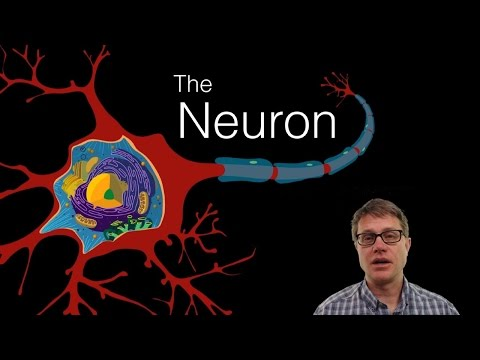

In [15]:
#axon = h.Section('axon')
#axon.L = 40
#axon.nseg = 3 # divided into 3 equally lengthed segments
#axon.connect(soma(1)) #connect axon to the right end of the soma
#h.topology() # shows topology of full cell
YouTubeVideo('HZh0A-lWSmY')

# Conclusion
You should now know how NEURON simulates a neuron, how to create a single cell model with channels using NEURON, the morphology of the soma, and how to use NEURON to conduct experiments/simulations of your own. For more help on how to use NEURON, click [here](http://web.mit.edu/neuron_v7.4/nrntuthtml/tutorial/tutA.html) and [here.](https://nrn.readthedocs.io/en/latest/tutorials/scripting-neuron-basics.html)